In [29]:
import pandas as pd
import tokenizers as t
import lda_implementation
from scipy.stats import hmean
import numpy as np

%matplotlib inline

In [26]:
# read in data
filtered_10K = pd.read_csv('datasets/10K_filtered_restaurant_reviews.csv', encoding='utf-8')
coded = pd.read_excel('datasets/manually_coded_reviews.xlsx', encoding='utf-8')
coded.fillna(0, inplace=True)

# Previous iterations of this project showed that there's a strong overlap between 
# "service"and "staff" (really, they are the same thing), so I want to combine them.
coded['serv'] = (coded.service + coded.staff).apply(lambda x: 1 if x > 0 else 0)
coded['pos_serv'] = (coded.pos_service + coded.pos_staff).apply(lambda x: 1 if x > 0 else 0)
coded['neg_serv'] = (coded.neg_service + coded.neg_staff).apply(lambda x: 1 if x > 0 else 0)
coded.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)

# Previous iterations also showed that I don't have enough data for ambiance or cleanliness
coded.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

In [3]:
coded.iloc[:,2:].sum()/coded.shape[0]

food         0.831731
pos_food     0.658654
neg_food     0.221154
wait         0.163462
pos_wait     0.067308
neg_wait     0.096154
price        0.245192
pos_price    0.125000
neg_price    0.120192
serv         0.552885
pos_serv     0.389423
neg_serv     0.197115
dtype: float64

<function stopwordsTokenizer at 0x1154fce60>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 25342
INFO:lda:n_words: 505949
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6116535
INFO:lda:<1000> log likelihood: -4284473
INFO:lda:<1999> log likelihood: -4279566


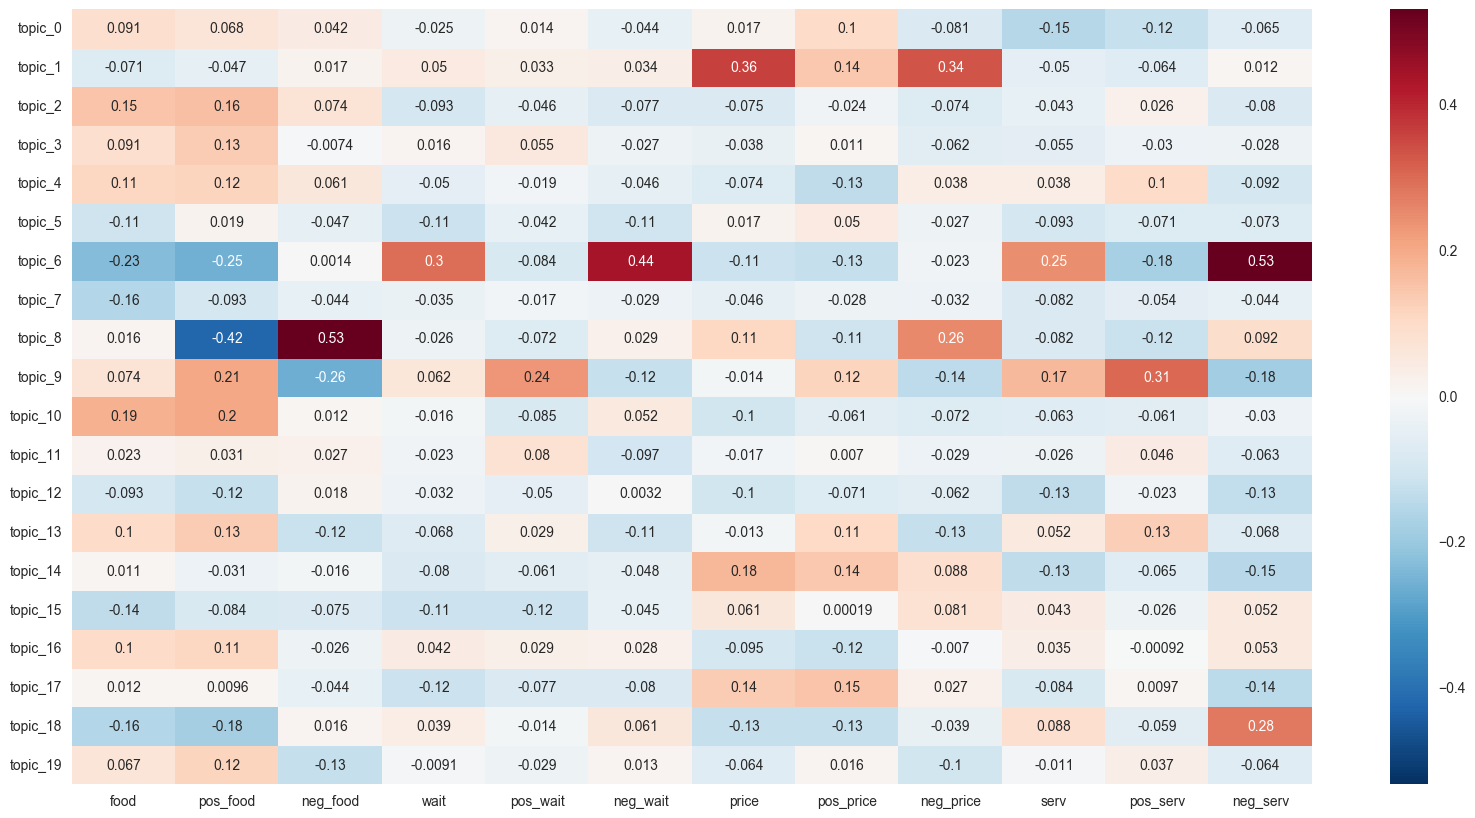

pos_food [('topic_9', 'topic_10'), 0.72530070936568314]
neg_food ['topic_8', 0.8165593129361246]
pos_wait [('topic_9', 'topic_11'), 0.74705449189985274]
neg_wait ['topic_6', 0.89920212765957452]
pos_price [('topic_1', 'topic_17'), 0.70879120879120872]
neg_price [('topic_1', 'topic_8'), 0.85879781420765033]
pos_serv ['topic_9', 0.7567804024496938]
neg_serv [('topic_6', 'topic_18'), 0.8435811304220826]
<function basicLemmaTokenizer at 0x11564b0c8>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 19898
INFO:lda:n_words: 466814
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -5441556
INFO:lda:<1000> log likelihood: -3790903
INFO:lda:<1999> log likelihood: -3792064


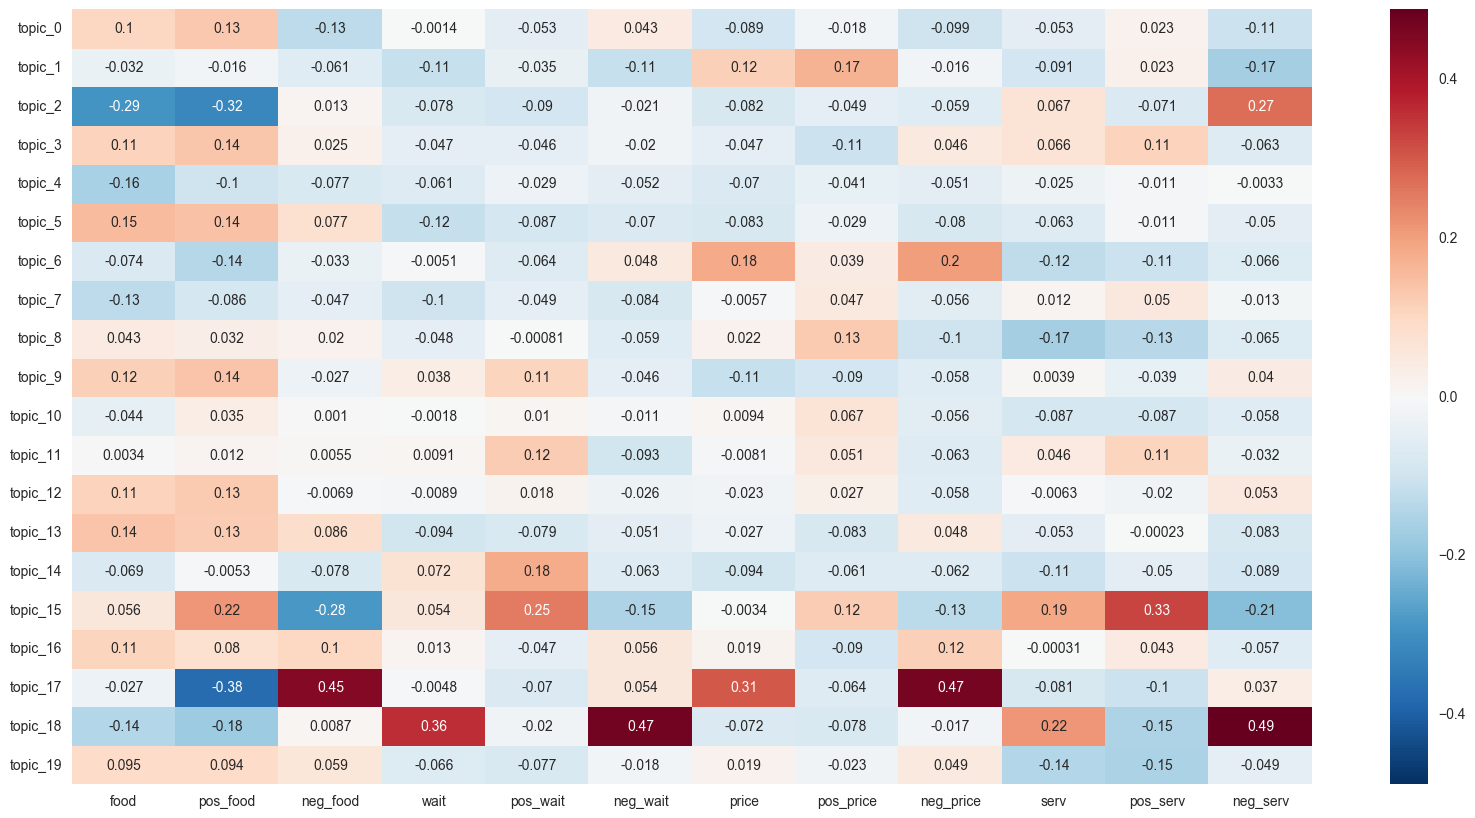

pos_food [('topic_0', 'topic_15'), 0.71286110825537163]
neg_food ['topic_17', 0.80421363392377887]
pos_wait [('topic_11', 'topic_15'), 0.74521354933726069]
neg_wait [('topic_18', 'topic_19'), 0.83351063829787231]
pos_price [('topic_8', 'topic_15'), 0.69463229078613697]
neg_price ['topic_17', 0.87453551912568295]
pos_serv ['topic_15', 0.73743559832798677]
neg_serv ['topic_18', 0.84212063677522997]
<function basicStemTokenizer at 0x11564b050>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 23688
INFO:lda:n_words: 549129
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6374619
INFO:lda:<1000> log likelihood: -4486862
INFO:lda:<1999> log likelihood: -4477530


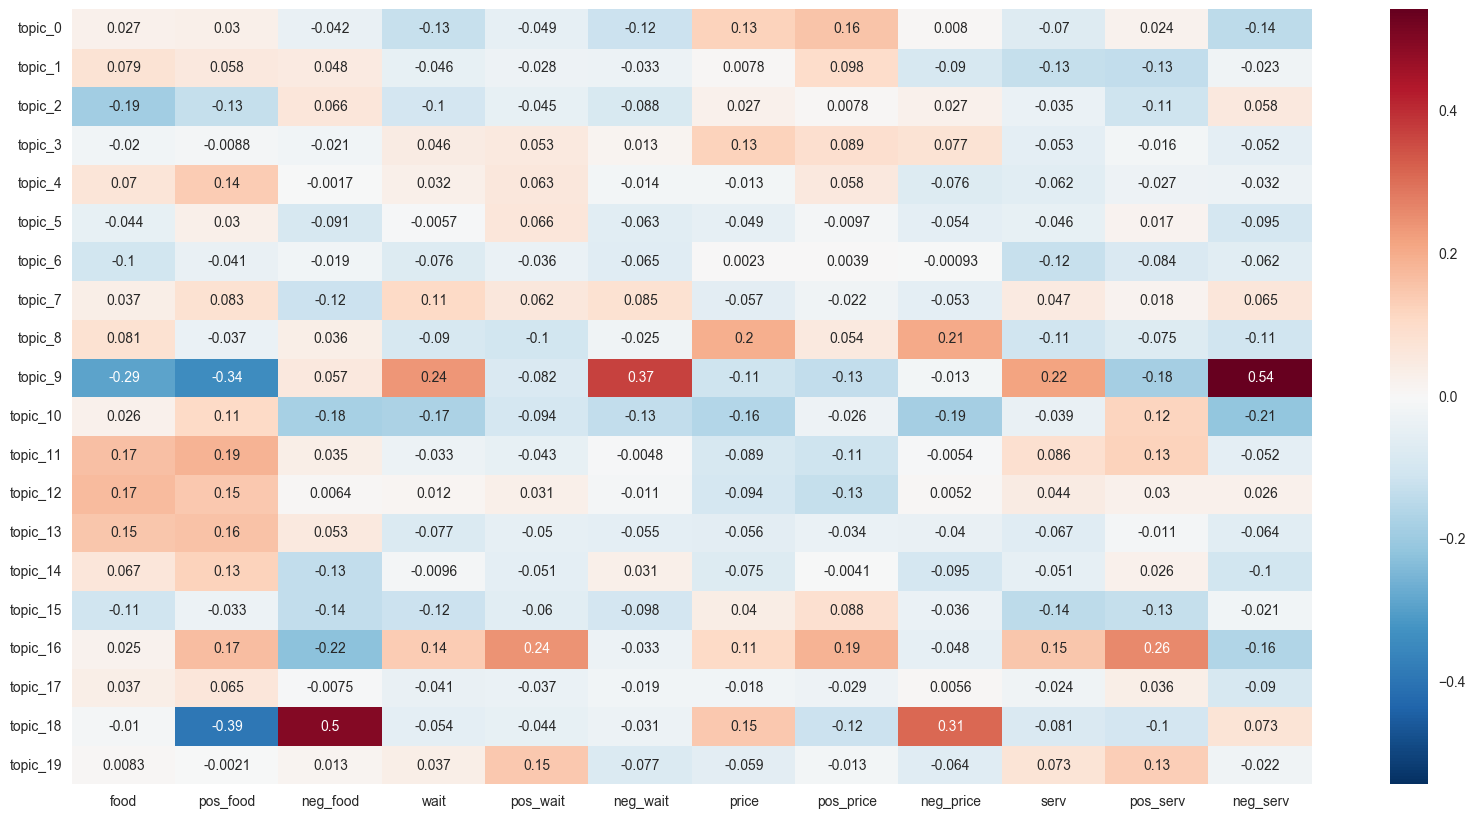

pos_food [('topic_11', 'topic_16'), 0.71944073198313974]
neg_food ['topic_18', 0.80770263016639821]
pos_wait [('topic_7', 'topic_16'), 0.76730486008836518]
neg_wait [('topic_7', 'topic_9'), 0.80345744680851061]
pos_price [('topic_3', 'topic_16'), 0.73816568047337283]
neg_price [('topic_8', 'topic_18'), 0.78688524590163944]
pos_serv [('topic_11', 'topic_16'), 0.69835714980071928]
neg_serv [('topic_2', 'topic_9'), 0.8272236015773331]
<function basicLemmaTokenizer2 at 0x1154fcf50>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 19921
INFO:lda:n_words: 474935
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -5530638
INFO:lda:<1000> log likelihood: -3858942
INFO:lda:<1999> log likelihood: -3854180


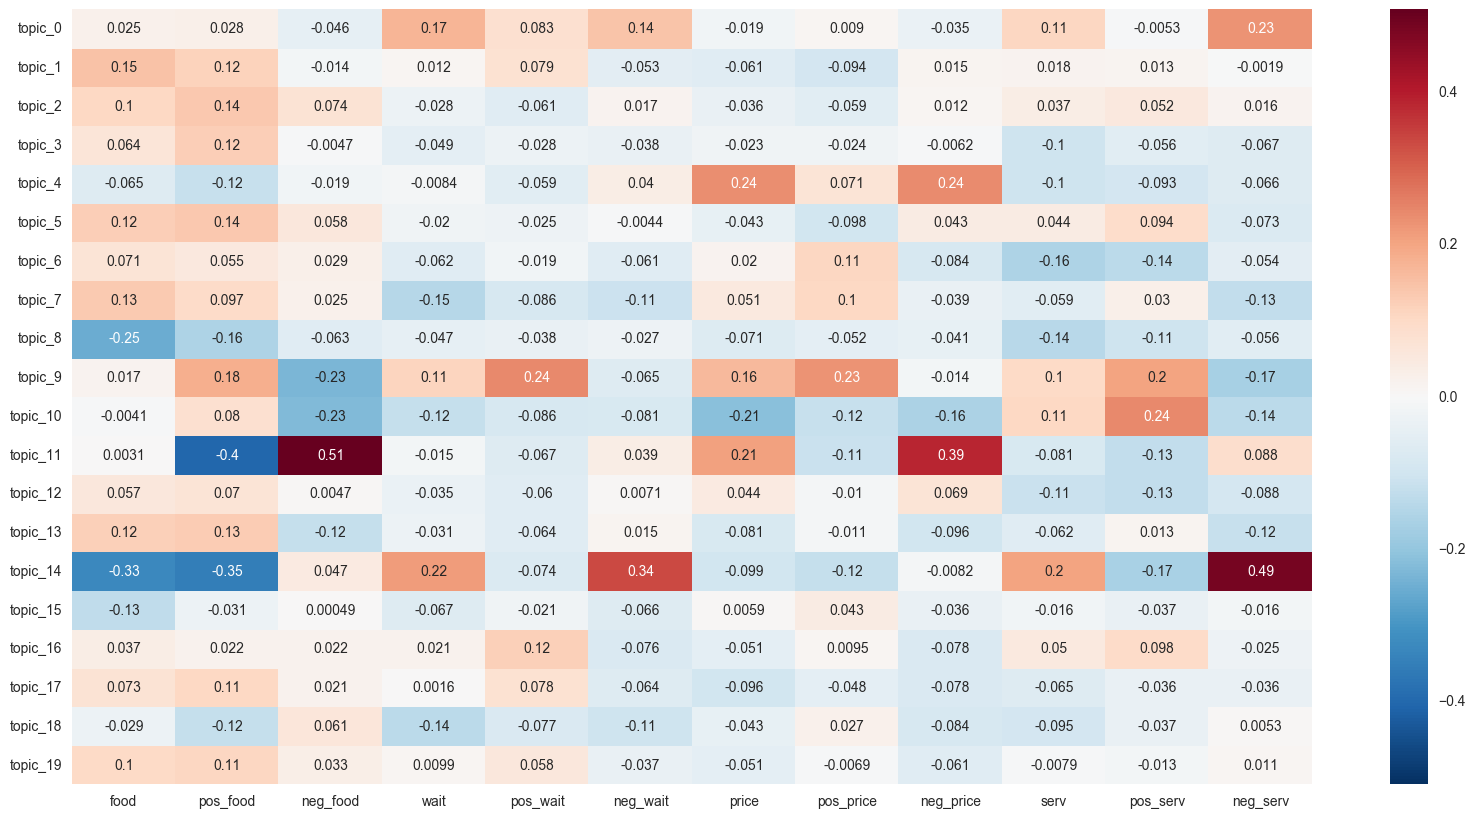

pos_food [('topic_5', 'topic_9'), 0.69959905417908919]
neg_food [('topic_2', 'topic_11'), 0.8326623725174449]
pos_wait [('topic_9', 'topic_16'), 0.78019145802650958]
neg_wait [('topic_0', 'topic_14'), 0.77792553191489366]
pos_price ['topic_9', 0.75063398140321214]
neg_price [('topic_4', 'topic_11'), 0.84918032786885245]
pos_serv [('topic_9', 'topic_10'), 0.71109166909691834]
neg_serv [('topic_0', 'topic_14'), 0.8380312545640427]
<function basicStemTokenizer2 at 0x1154fced8>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 23702
INFO:lda:n_words: 553912
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6435839
INFO:lda:<1000> log likelihood: -4531065
INFO:lda:<1999> log likelihood: -4525286


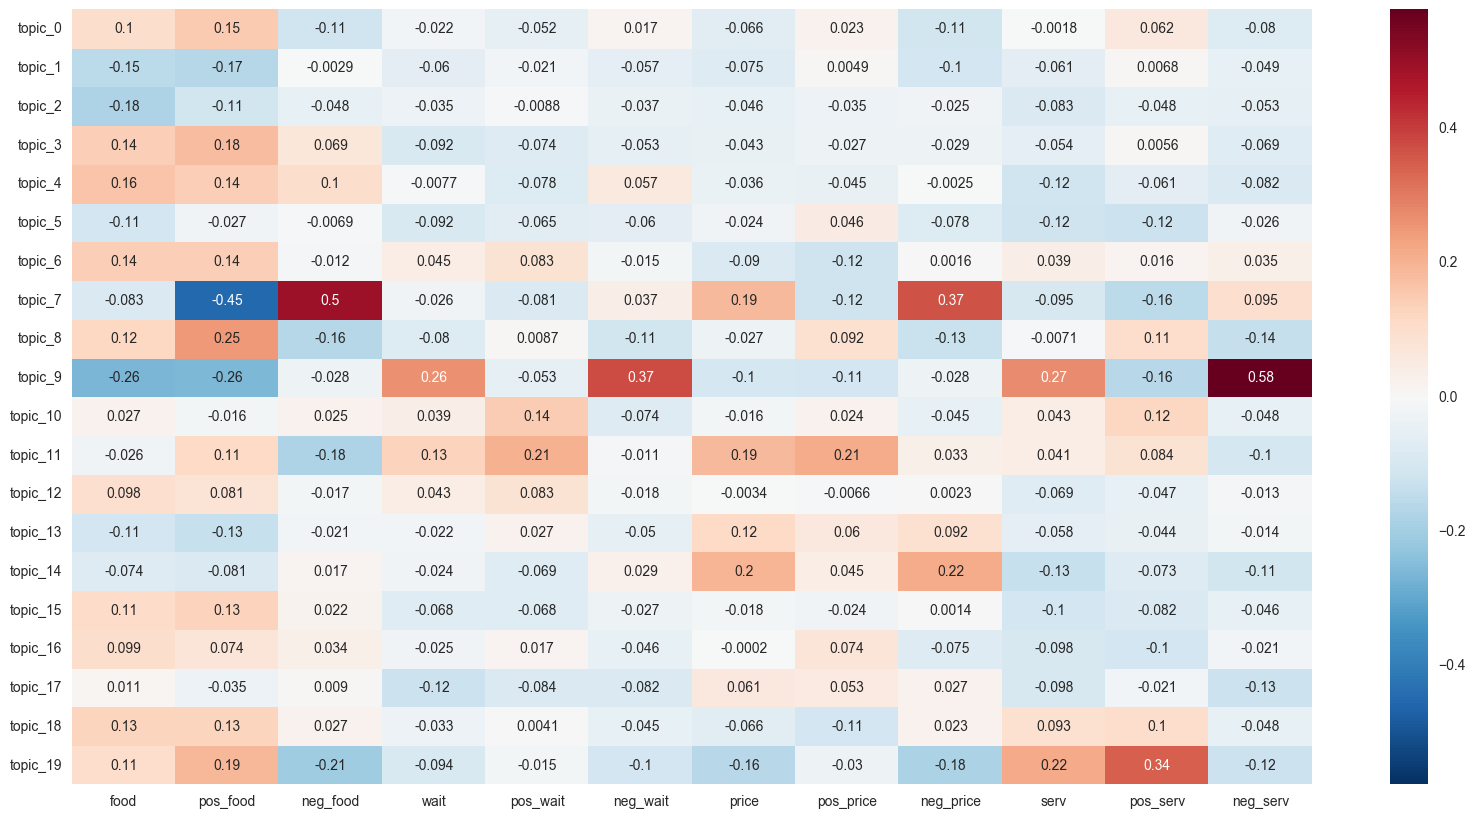

pos_food [('topic_8', 'topic_19'), 0.72488948288269772]
neg_food ['topic_7', 0.832259796027912]
pos_wait [('topic_10', 'topic_11'), 0.79749631811487487]
neg_wait ['topic_9', 0.83829787234042552]
pos_price [('topic_11', 'topic_17'), 0.75781910397295016]
neg_price [('topic_7', 'topic_14'), 0.81158469945355194]
pos_serv [('topic_6', 'topic_19'), 0.73335277534752596]
neg_serv ['topic_9', 0.84547977216299108]
<function polarityTokenizer at 0x11564b140>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 21450
INFO:lda:n_words: 557157
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6116267
INFO:lda:<1000> log likelihood: -4280407
INFO:lda:<1999> log likelihood: -4273816


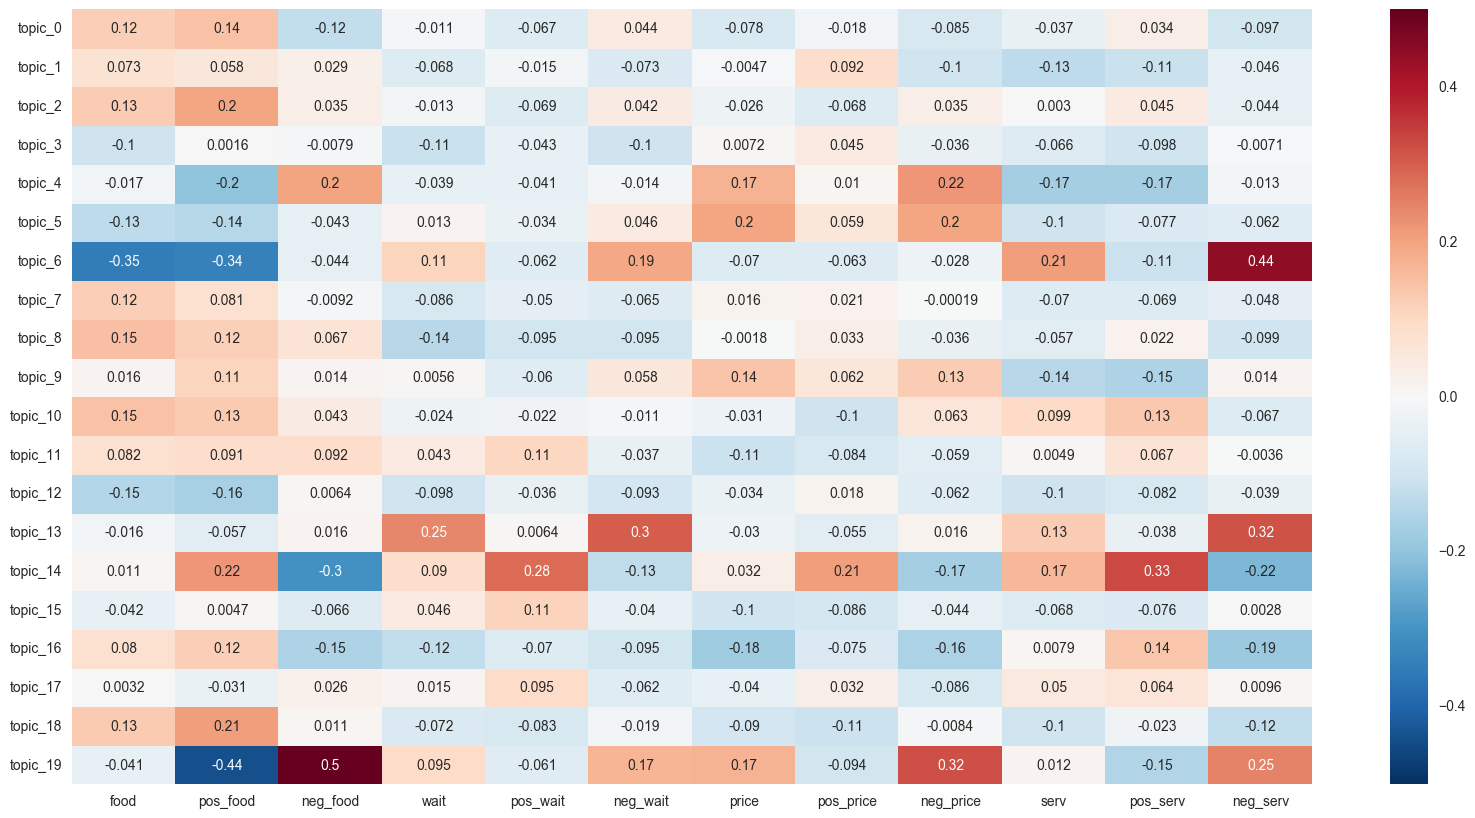

pos_food [('topic_14', 'topic_18'), 0.74503958054898745]
neg_food ['topic_19', 0.82259796027911969]
pos_wait [('topic_14', 'topic_15'), 0.80117820324005895]
neg_wait ['topic_13', 0.79202127659574462]
pos_price [('topic_1', 'topic_14'), 0.72696534234995769]
neg_price [('topic_4', 'topic_19'), 0.81879781420765019]
pos_serv ['topic_14', 0.75007290755322242]
neg_serv [('topic_6', 'topic_13'), 0.81802249160216145]
<function polarAdjectivesTokenizer at 0x11564b1b8>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 18472
INFO:lda:n_words: 475834
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -5264027
INFO:lda:<1000> log likelihood: -3645240
INFO:lda:<1999> log likelihood: -3644166


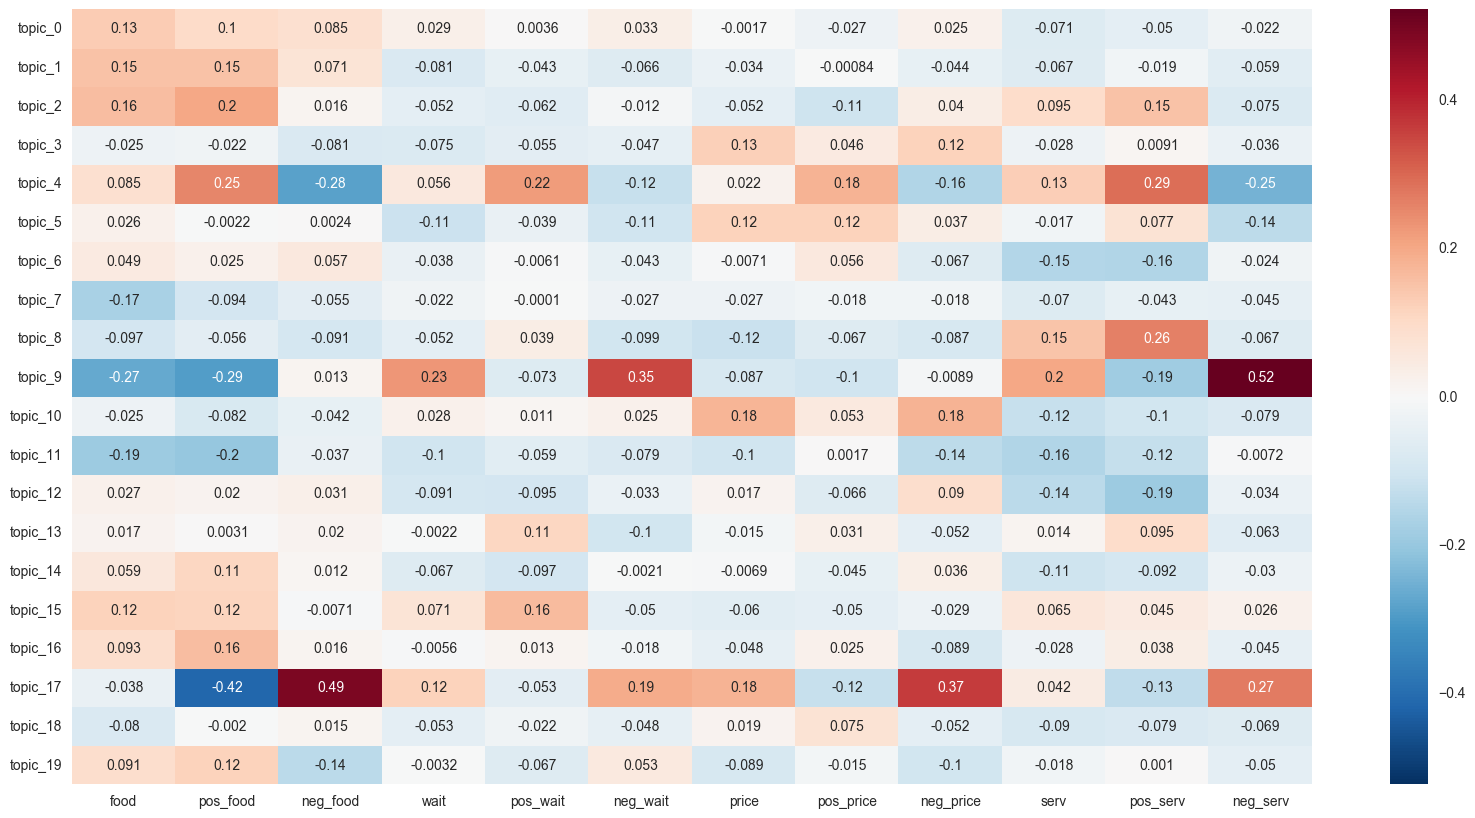

pos_food [('topic_2', 'topic_4'), 0.74216099516808887]
neg_food [('topic_12', 'topic_17'), 0.80864197530864201]
pos_wait [('topic_4', 'topic_15'), 0.7805596465390281]
neg_wait [('topic_9', 'topic_17'), 0.81968085106382982]
pos_price [('topic_4', 'topic_18'), 0.69019442096365169]
neg_price [('topic_3', 'topic_17'), 0.82754098360655737]
pos_serv [('topic_4', 'topic_8'), 0.74744823563721208]
neg_serv [('topic_9', 'topic_17'), 0.85964656053746169]
<function foodwordTokenizer at 0x11564b230>


INFO:lda:n_documents: 9689
INFO:lda:vocab_size: 19489
INFO:lda:n_words: 538443
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -5772708
INFO:lda:<1000> log likelihood: -4031026
INFO:lda:<1999> log likelihood: -4026303


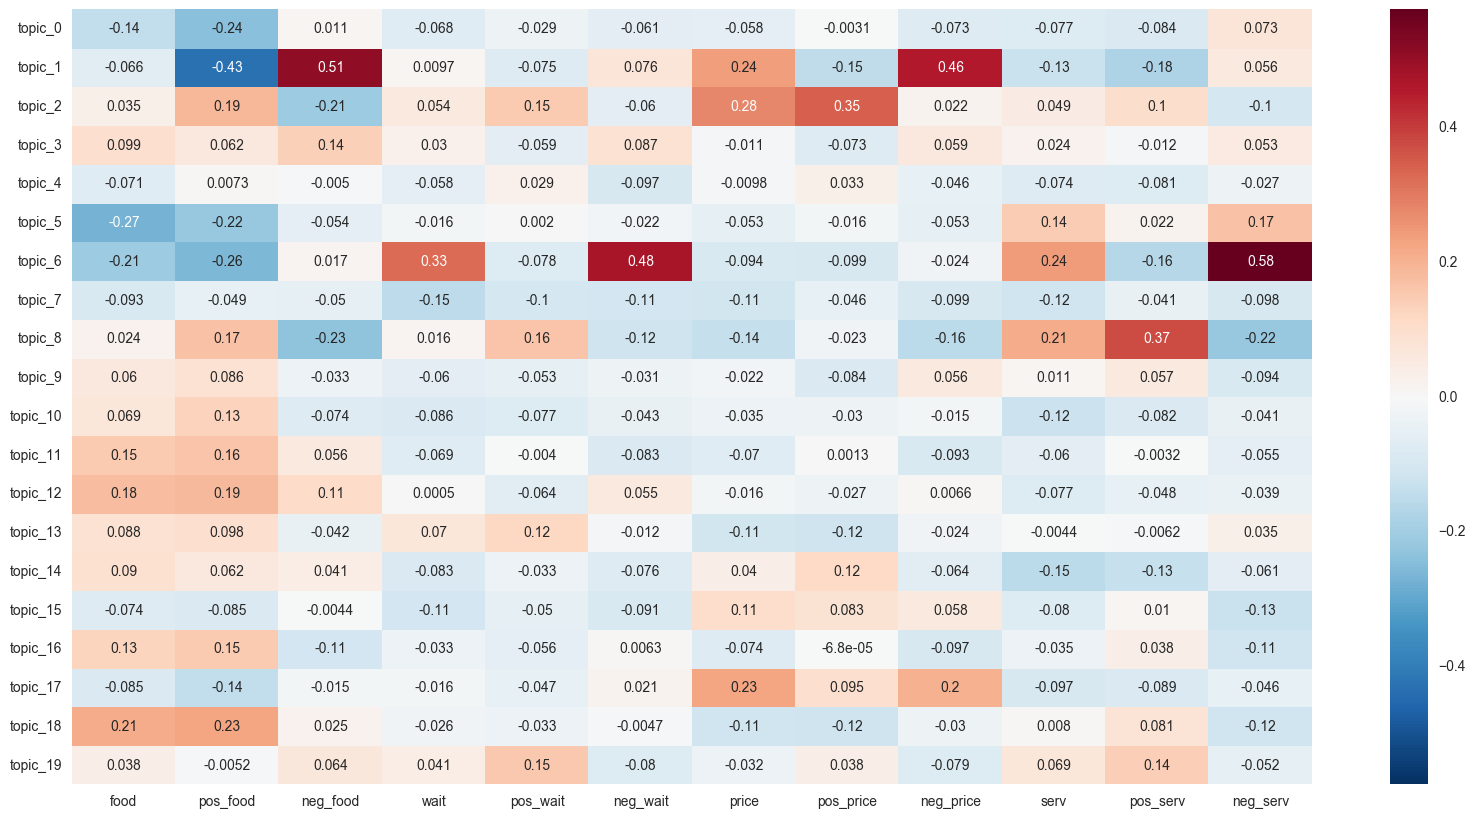

pos_food [('topic_2', 'topic_18'), 0.73449735449735454]
neg_food ['topic_1', 0.86669401148482361]
pos_wait [('topic_13', 'topic_19'), 0.77636499626028421]
neg_wait [('topic_6', 'topic_12'), 0.87135135135135133]
pos_price [('topic_2', 'topic_15'), 0.84688888888888891]
neg_price ['topic_1', 0.86755555555555564]
pos_serv [('topic_8', 'topic_9'), 0.72573839662447248]
neg_serv ['topic_6', 0.85618679357525285]
<function foodwordReplacedTokenizer at 0x11564b2a8>


INFO:lda:n_documents: 9689
INFO:lda:vocab_size: 18522
INFO:lda:n_words: 446462
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -4712799
INFO:lda:<1000> log likelihood: -3299039
INFO:lda:<1999> log likelihood: -3293420


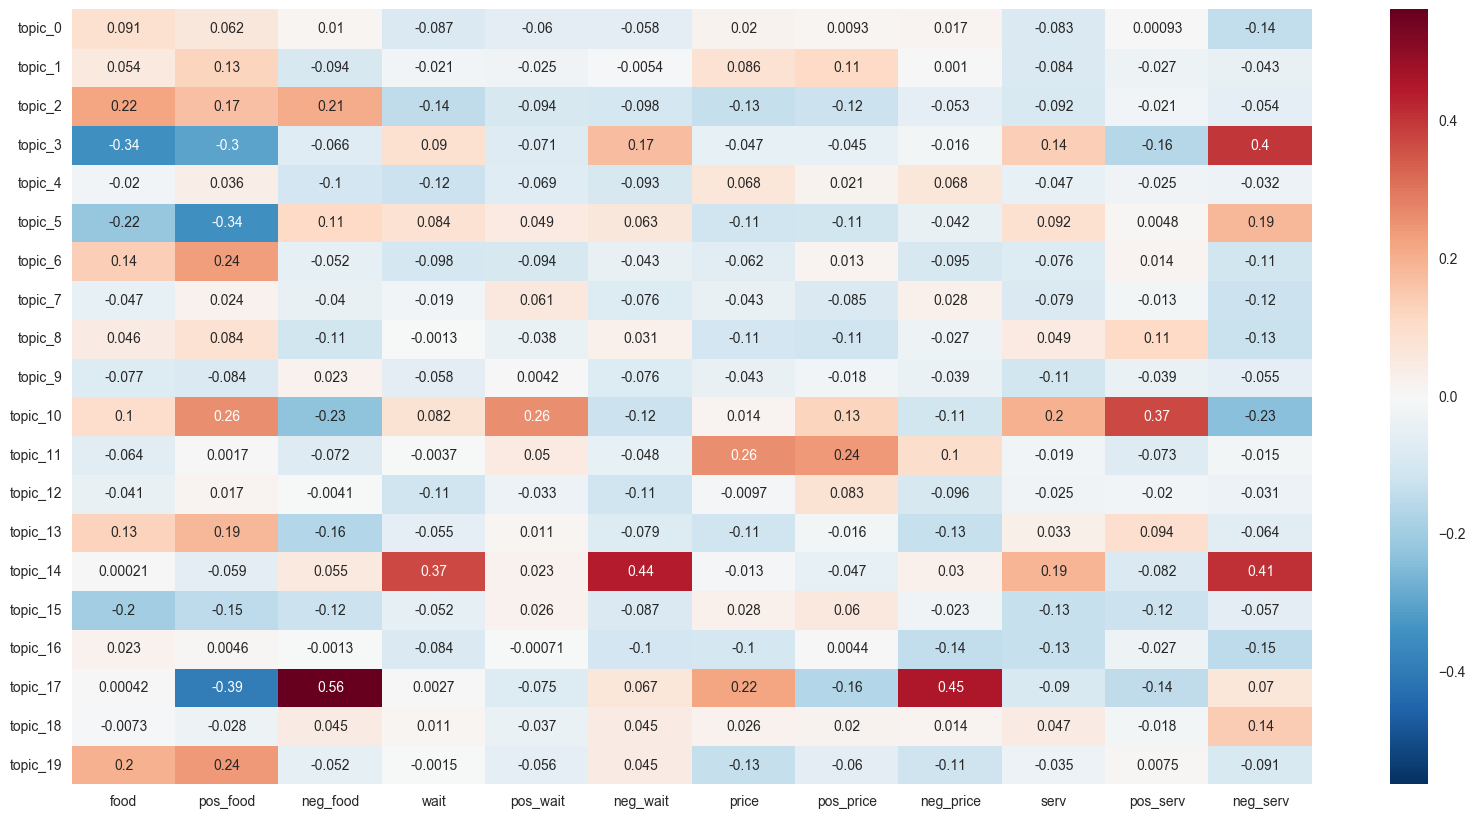

pos_food [('topic_10', 'topic_19'), 0.76751322751322759]
neg_food [('topic_2', 'topic_17'), 0.88856986601039101]
pos_wait [('topic_10', 'topic_14'), 0.76103216155572184]
neg_wait ['topic_14', 0.85297297297297292]
pos_price ['topic_11', 0.73755555555555552]
neg_price ['topic_17', 0.85644444444444445]
pos_serv [('topic_8', 'topic_10'), 0.76763110307414106]
neg_serv [('topic_3', 'topic_14'), 0.86808447352766205]


In [4]:
# test different tokenizers
tokenizers = [t.stopwordsTokenizer, t.basicLemmaTokenizer, t.basicStemTokenizer, 
              t.basicLemmaTokenizer2, t.basicStemTokenizer2, 
              t.polarityTokenizer, t.polarAdjectivesTokenizer, t.foodwordTokenizer, 
              t.foodwordReplacedTokenizer]

top_scores = {}
for tokenizer in tokenizers:
    print tokenizer
    count_vec, rev_vec, rev_badlines = t.fitApplyVectorizer(filtered_10K.text, tokenizer)
    reviews = filtered_10K.copy()
    reviews = reviews[reviews.text.apply(lambda x: False if x in rev_badlines else True)]

    code_vec, code_badlines = t.applyVectorizer(coded.text, tokenizer, count_vec)
    code_rev = coded.copy()
    code_rev = code_rev[code_rev.text.apply(lambda x: False if x in code_badlines else True)]
    
    imp = lda_implementation.compareToManual(reviews.text, rev_vec, code_rev, code_vec)
    top_scores[tokenizer] = imp

In [5]:
# compare summary stats of tokenizers
for tokenizer, values in sorted(top_scores.iteritems()):
    vals = []
    for value in values:
        vals += [value[1][1]]
    print "{}: mean: {:.3f}, hmean: {:.3f}, min-max: {:.3f}-{:.3f}".format(
        # ignore the last 4 because they're too infrequent
        str(tokenizer).split()[1], np.mean(vals[:10]), hmean(vals[:10]), min(vals[:10]), max(vals[:10]))

stopwordsTokenizer: mean: 0.795, hmean: 0.789, min-max: 0.709-0.899
basicStemTokenizer2: mean: 0.793, hmean: 0.790, min-max: 0.725-0.845
basicLemmaTokenizer2: mean: 0.780, hmean: 0.776, min-max: 0.700-0.849
basicStemTokenizer: mean: 0.769, hmean: 0.766, min-max: 0.698-0.827
basicLemmaTokenizer: mean: 0.781, hmean: 0.776, min-max: 0.695-0.875
polarityTokenizer: mean: 0.784, hmean: 0.783, min-max: 0.727-0.823
polarAdjectivesTokenizer: mean: 0.784, hmean: 0.781, min-max: 0.690-0.860
foodwordTokenizer: mean: 0.818, hmean: 0.814, min-max: 0.726-0.871
foodwordReplacedTokenizer: mean: 0.812, hmean: 0.809, min-max: 0.738-0.889


Observations:
- Stemming, without expanding contractions, was the best tokenizer on its own
- Foodword codewords really improved the scores!
- Since the foodwords codeword implementations I chose involved lemmatization, I should check the foodwords codeword implementation with porter stemmers instead.
- Polarization codewords actually didn't make the implementation much better. I will try it *with* foodword codewords to see if it works better in combination.

<function foodwordTokenizer2 at 0x12c33ef50>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 23703
INFO:lda:n_words: 612983
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6821206
INFO:lda:<1000> log likelihood: -4800999
INFO:lda:<1999> log likelihood: -4797134


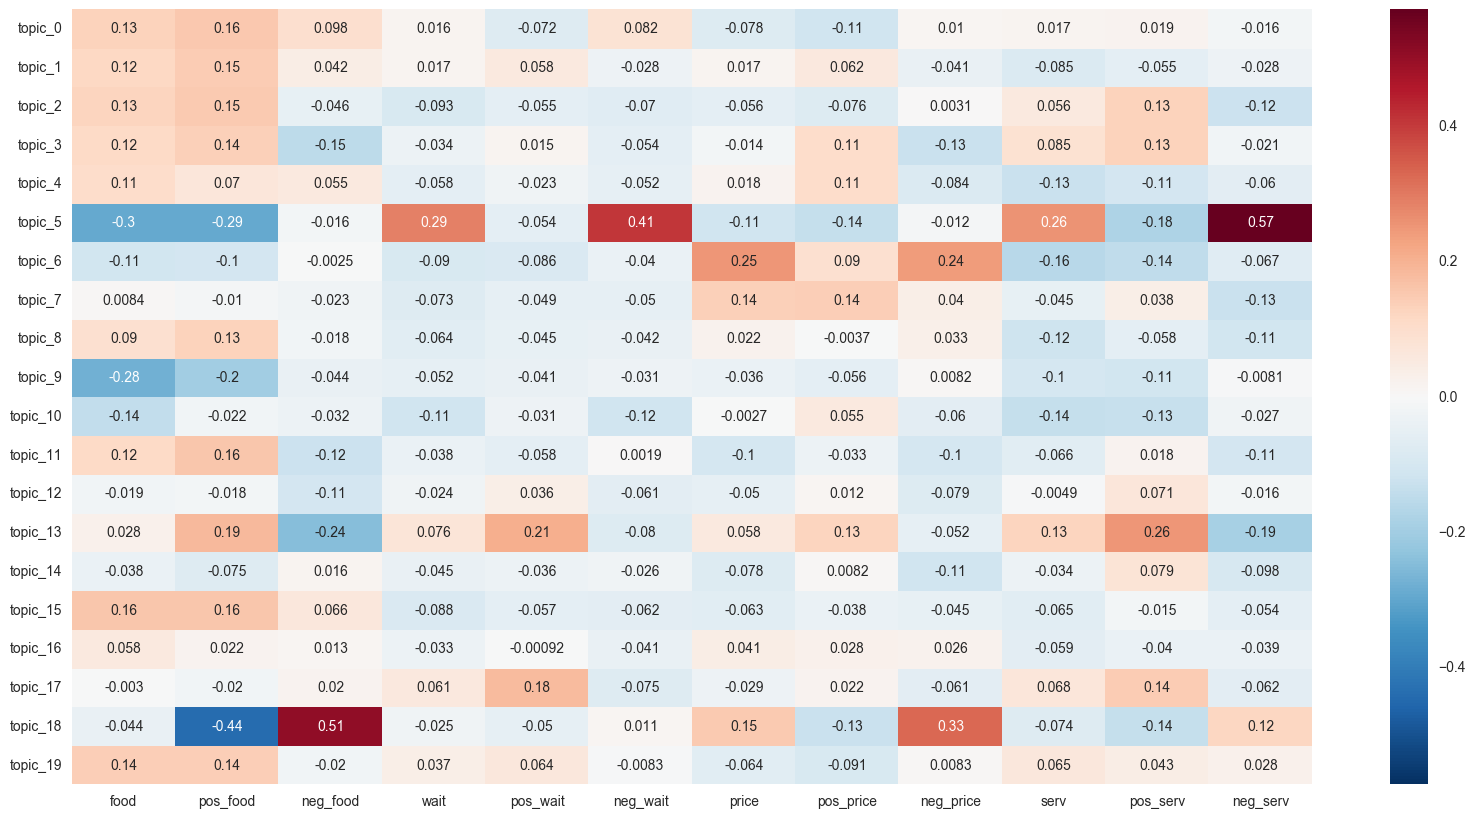

pos_food [('topic_0', 'topic_19'), 0.71162742880641516]
neg_food [('topic_0', 'topic_18'), 0.81146001073537311]
pos_wait [('topic_13', 'topic_17'), 0.74374079528718706]
neg_wait ['topic_5', 0.8457446808510638]
pos_price [('topic_7', 'topic_13'), 0.69463229078613697]
neg_price [('topic_6', 'topic_18'), 0.82907103825136619]
pos_serv [('topic_2', 'topic_13'), 0.69913483036842616]
neg_serv [('topic_5', 'topic_18'), 0.84767051263327009]
<function foodwordReplacedTokenizer2 at 0x12c33e410>


INFO:lda:n_documents: 9998
INFO:lda:vocab_size: 23541
INFO:lda:n_words: 555211
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6180029
INFO:lda:<1000> log likelihood: -4374828
INFO:lda:<1999> log likelihood: -4370356


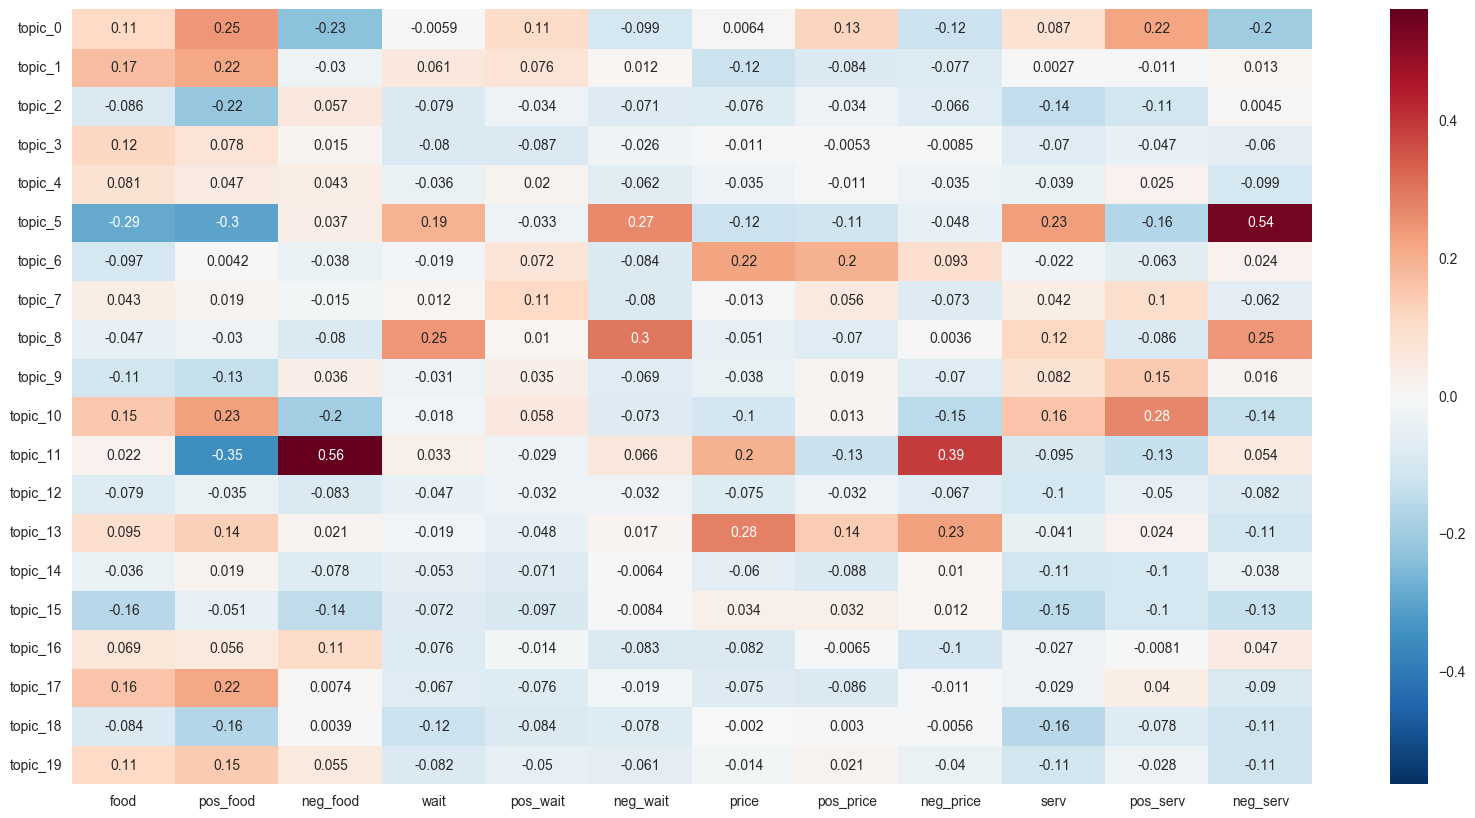

pos_food [('topic_0', 'topic_10'), 0.76138583324766118]
neg_food [('topic_11', 'topic_16'), 0.85077831454643049]
pos_wait ['topic_6', 0.71759941089837997]
neg_wait ['topic_8', 0.85558510638297869]
pos_price [('topic_0', 'topic_6'), 0.72358410819949281]
neg_price [('topic_11', 'topic_13'), 0.85836065573770493]
pos_serv [('topic_0', 'topic_10'), 0.74424030329542135]
neg_serv [('topic_5', 'topic_8'), 0.85059149992697536]


In [38]:
# compare the foodword tokenizers with stemmers
tokenizers = [t.foodwordTokenizer2, t.foodwordReplacedTokenizer2]

top_scores = {}
for tokenizer in tokenizers:
    print tokenizer
    count_vec, rev_vec, rev_badlines = t.fitApplyVectorizer(filtered_10K.text, tokenizer)
    reviews = filtered_10K.copy()
    reviews = reviews[reviews.text.apply(lambda x: False if x in rev_badlines else True)]

    code_vec, code_badlines = t.applyVectorizer(coded.text, tokenizer, count_vec)
    code_rev = coded.copy()
    code_rev = code_rev[code_rev.text.apply(lambda x: False if x in code_badlines else True)]
    
    imp = lda_implementation.compareToManual(reviews.text, rev_vec, code_rev, code_vec)
    top_scores[tokenizer] = imp

In [39]:
# compare summary stats of tokenizers
for tokenizer, values in sorted(top_scores.iteritems()):
    vals = []
    for value in values:
        vals += [value[1][1]]
    print "{}: mean: {:.3f}, hmean: {:.3f}, min-max: {:.3f}-{:.3f}".format(
        # ignore the last 4 because they're too infrequent
        str(tokenizer).split()[1], np.mean(vals[:10]), hmean(vals[:10]), min(vals[:10]), max(vals[:10]))

foodwordReplacedTokenizer2: mean: 0.795, hmean: 0.791, min-max: 0.718-0.858
foodwordTokenizer2: mean: 0.773, hmean: 0.768, min-max: 0.695-0.848


Observations:
- Porter stemming actually made the foodword codeword implementation worse, so I will stick with the lemmatized version.

<function foodwordPolarityTokenizer at 0x12c33e5f0>


INFO:lda:n_documents: 9689
INFO:lda:vocab_size: 19491
INFO:lda:n_words: 616730
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -6311326
INFO:lda:<1000> log likelihood: -4419772
INFO:lda:<1999> log likelihood: -4414546


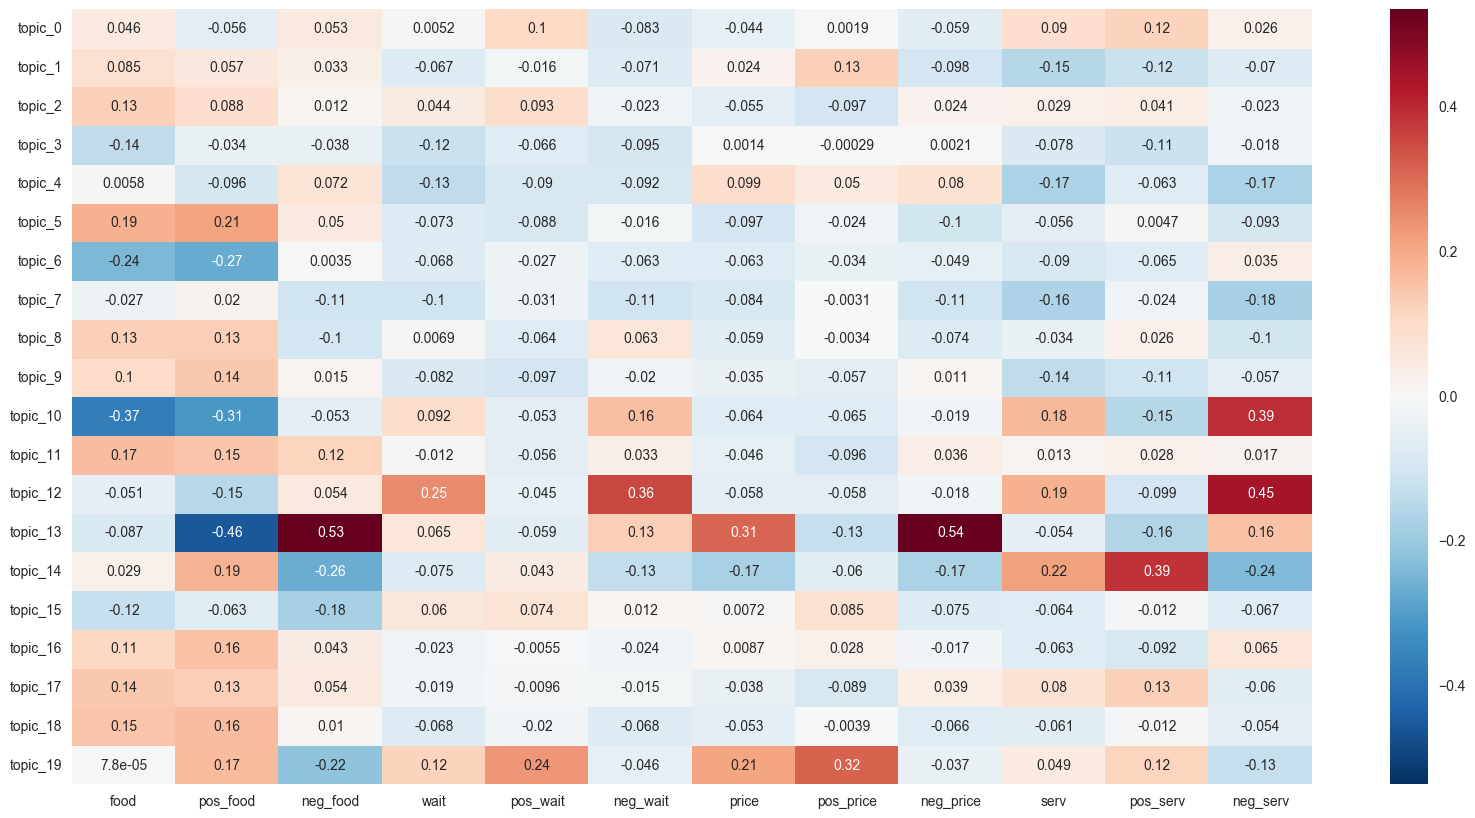

pos_food [('topic_5', 'topic_14'), 0.72359788359788357]
neg_food ['topic_13', 0.87284659557013944]
pos_wait [('topic_0', 'topic_19'), 0.77449513836948392]
neg_wait ['topic_12', 0.8472972972972973]
pos_price [('topic_15', 'topic_19'), 0.7877777777777778]
neg_price ['topic_13', 0.89266666666666661]
pos_serv [('topic_14', 'topic_17'), 0.75868997387984738]
neg_serv [('topic_10', 'topic_12'), 0.86377156454491377]
<function foodwordReplacedPolarityTokenizer at 0x12c33e578>


INFO:lda:n_documents: 9689
INFO:lda:vocab_size: 18561
INFO:lda:n_words: 528660
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000


Topics: 20, Alpha: 0.1, Beta: 0.01


INFO:lda:<0> log likelihood: -5288865
INFO:lda:<1000> log likelihood: -3709212
INFO:lda:<1999> log likelihood: -3704311


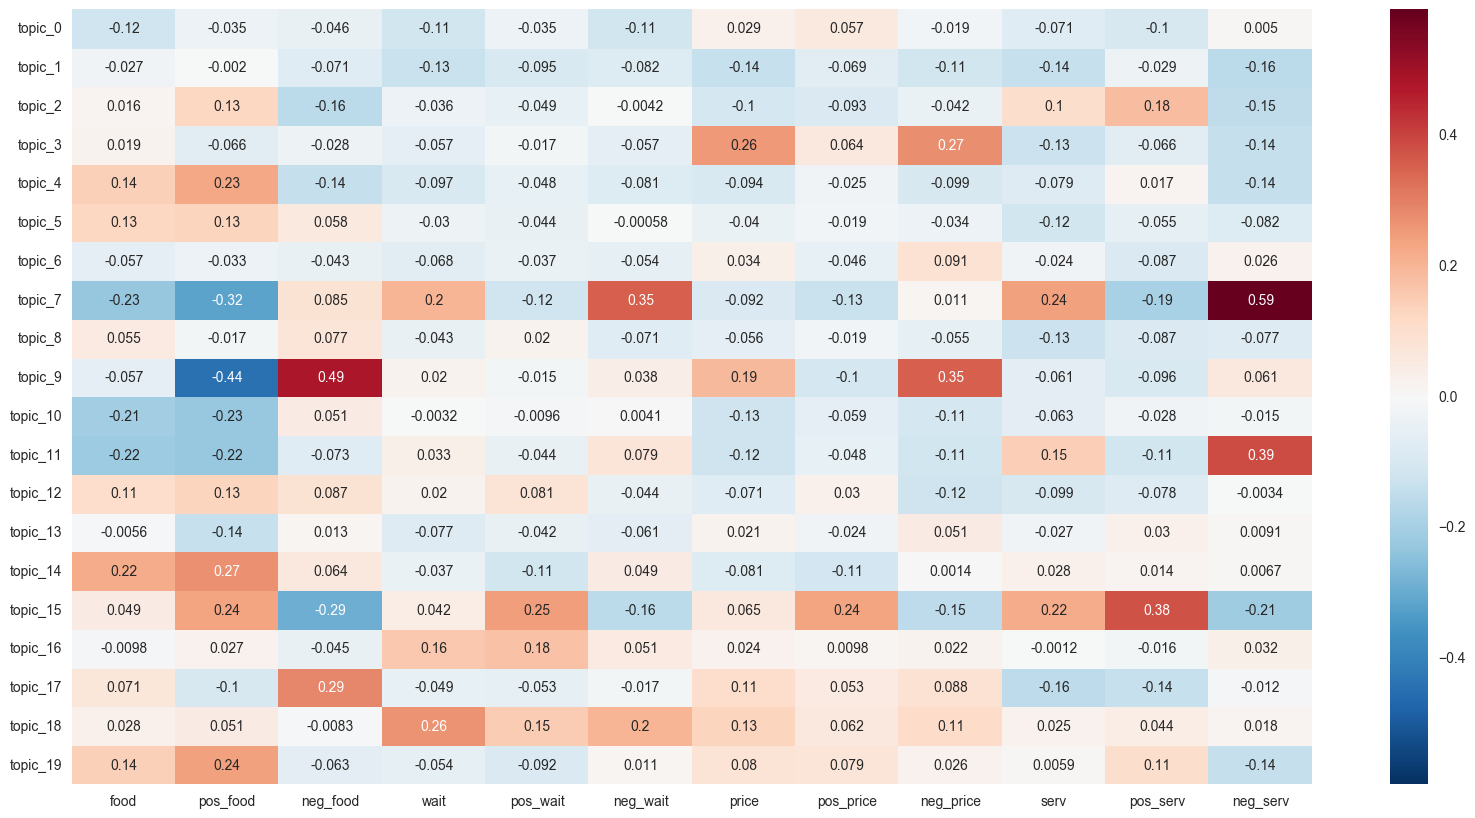

pos_food [('topic_14', 'topic_15'), 0.77820105820105823]
neg_food [('topic_9', 'topic_17'), 0.85097074104457204]
pos_wait [('topic_15', 'topic_18'), 0.82385938668661174]
neg_wait [('topic_7', 'topic_18'), 0.82324324324324327]
pos_price [('topic_0', 'topic_15'), 0.74444444444444446]
neg_price [('topic_3', 'topic_9'), 0.83466666666666667]
pos_serv [('topic_2', 'topic_15'), 0.7763713080168777]
neg_serv [('topic_7', 'topic_11'), 0.89113622843545515]


In [41]:
#### compare the two foodword tokenizers using expanded contractions and lemmatization
tokenizers = [t.foodwordPolarityTokenizer, t.foodwordReplacedPolarityTokenizer]

top_scores = {}
for tokenizer in tokenizers:
    print tokenizer
    count_vec, rev_vec, rev_badlines = t.fitApplyVectorizer(filtered_10K.text, tokenizer)
    reviews = filtered_10K.copy()
    reviews = reviews[reviews.text.apply(lambda x: False if x in rev_badlines else True)]

    code_vec, code_badlines = t.applyVectorizer(coded.text, tokenizer, count_vec)
    code_rev = coded.copy()
    code_rev = code_rev[code_rev.text.apply(lambda x: False if x in code_badlines else True)]
    
    imp = lda_implementation.compareToManual(reviews.text, rev_vec, code_rev, code_vec)
    top_scores[tokenizer] = imp

In [33]:
# compare summary stats of tokenizers
for tokenizer, values in sorted(top_scores.iteritems()):
    vals = []
    for value in values:
        vals += [value[1][1]]
    print "{}: mean: {:.3f}, hmean: {:.3f}, min-max: {:.3f}-{:.3f}".format(
        # ignore the last 4 because they're too infrequent
        str(tokenizer).split()[1], np.mean(vals[:10]), hmean(vals[:10]), min(vals[:10]), max(vals[:10]))

tokenizers.foodwordPolarityTokenizer>: mean: 0.815, hmean: 0.811, min-max: 0.724-0.893
tokenizers.foodwordReplacedPolarityTokenizer>: mean: 0.815, hmean: 0.813, min-max: 0.744-0.891


Observations:
- It's mostly a wash, however adding the polarity did push some of the topics' scores higher, so I will keep the polarity in.
- I will stick with the foodword tokenizer that doesn't involve replacement, because they perform about equally well but I would prefer not to lose information.

### Best tokenizer: foodwordPolarityTokenizer